In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
np.random.seed(0)

In [18]:
data_load = sio.loadmat("./AA_NOAA.mat")

In [19]:
rain_pbs = data_load["rain_pds"]
rain_pbs_lower = data_load["rain_pds_lower"]
rain_pbs_upper = data_load["rain_pds_upper"]

This notebook outlines the generation of sythetic rainfall data based on *Precipitation-Frequency Atlas 14 of the United States*. 

## Modelling the rainfall distribution
Rainfall intensity can be modelled using using gamma distribution, parametrized by mean rainfall intensity and 90% confidence interavel (1,2,3). 

---
**Gamma Distribution:**
Gamma distribution's pdf is given by,

$$ f(x ; k, \theta)=\frac{x^{k-1} e^{-\frac{x}{\theta}}}{\theta^{k} \Gamma(k)} \quad \text { for } x>0 \text { and } k, \theta>0 $$ 

where $k, \theta$ control the shape and scale of the distribution. 

---
$k$
$\theta$

Intensity of the rainfall can be generated by sampling the above described gamma distribution. Additionally, we have to the determine when the maximum amount of precipitation would occur. 

Atlas 14 divides the rainfall duration into 4 quartiles. Each of these quartiles is further divided into 10 deciles for higher resolution. 


[1] S.M. Papalexiou, D. Koutsoyiannis and C. Makropoulos, '"How extreme is extreme? An assessment of daily rainfall distribution tails," Hydrol.Earth Syst.Sci., vol. 17, no. 2, 28~ # feb, pp. 851-862.

[2] H. Hanum, A.H. Wigena, A. Djuraidah and I.W. Mangku, '"Modeling extreme rainfall with Gamma-Pareto distribution," Appl.Math.Sci., vol. 9, no. 121, pp. 6029-6039.

[3] H. Aksoy, '"Use of gamma distribution in hydrological analysis," Turk.J.Eng.Environ.Sci., vol. 24, no. 6, pp. 419-428.

* **Step - 1**
    Sample twice from a uniform distribution to determine the quartile and decile. 
* **Step - 2**
    Use the samples to generate a temporal curve with unit intensity. 
* **Step - 3**
    Sample the gamma distribution for intesity of the rainfall 
* **Step - 4**
    Scale the curve in second step based on the intensity

In [5]:
# Define the function to generate the intensity based on gamma distribution
def intensity(return_period, duration):
    RETURN_PERIOD = [0,1,2,5,10,25,50,100,200,500,1000] # Years
    DURATION = [5,10,15,30,60,120,180,360,720,1440,2880]# Minutes
    
    # Load the intensity data
    data_load = sio.loadmat("./AA_NOAA.mat")
    # DATA SOURCE : Ann Arbor PDS data from NOAA Atlas 14
    # TODO: Add the link to this data 
    rain_pds = data_load["rain_pds"]
    rain_pds_lower = data_load["rain_pds_lower"]
    rain_pds_upper = data_load["rain_pds_upper"]
    
    i_return_period = RETURN_PERIOD.index(return_period)
    i_duration = DURATION.index(duration)
    
    # Get the mean and variance 
    pds_avg  = rain_pds[i_duration, i_return_period]
    pds_lower= rain_pds_lower[i_duration, i_return_period]
    pds_upper= rain_pds_upper[i_duration, i_return_period]
    
    mean = pds_avg
    vari = np.mean([pds_lower - mean, pds_upper - mean])
    
    mu = np.log((mean**2)/np.sqrt(vari+mean**2))
    sigma = np.sqrt(np.log(vari/(mean**2)+1))
    # TODO check for numerical precision based on the python implementation 
    # ASK brandon.
    
    return np.random.lognormal(mu, sigma)

In [6]:
intensity(10, 1440)

3.197782803923531

In [21]:
def scsIIdistribution(scale):
    rain_distribution = sio.loadmat("./scs2distribution.mat")["rain_dist"]
    time_distribution = np.arange(0, 24, 0.10)
    return rain_distribution, time_distribution

In [24]:
rain, time= scsIIdistribution(1.0)
rain = np.diff(rain)

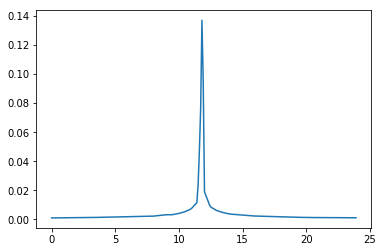

In [29]:
plt.plot(time, rain.reshape(-1));plt.show()

In [31]:
np.timedelta64("10", "m")

numpy.timedelta64(10,'m')

In [35]:
 np.datetime64('2019-01-01T00:00')

numpy.datetime64('2019-01-01T00:00')

In [40]:
a = np.arange(np.datetime64('2019-01-01T00:00'), np.datetime64('2019-01-02T00:00'), np.timedelta64("60", "m"))

In [44]:
a[0].

numpy.datetime64('2019-01-01T00:00')

In [ ]:
print(('%s	          	%02d:%02d:%02d  	%f\n','DESIGN_10YR12HR_ALT',hours(m),mins(m),0,rain_transform(m))